# Clean the Data (Feature Engineering)

## There are two options for cleaning this data.  
       1) Cleaning the .csv in Excel
       2) Cleaning the data in Python/Jupyter Notebook
              (We will show how to clean the data in the Notebook)
              
## You may skip this step if you clean your dataset in the .csv document
        (see healthcare-dataset-stroke-data(clean_dataset).csv

### What data are we going to do?
### 1) Drop unnecessary data
### 2) Check for duplicates
### 3) Check for missing data

### Step 1: Drop the columns that are either missing most of the times or are not relevant
* The `id` is an identifier to uniquely identify the visit of a patient in a hospital. Each of the rows are individual instances. Also, there is no importance of this variable from prediction point to of view and hence it would be wise to drop this too.

In [57]:
#Commands to install some of the libraries in-case if they are not installed
#Any other library that needs to be installed just use: !pip install <library name>
!pip install seaborn
!pip install missingno
!pip install xgboost
!pip install catboost
!pip install regex
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install imblearn
!pip install lightgbm
!pip install -U scikit-learn
!pip install nbformat==4.2.0
!pip install statsmodels


In [58]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [62]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
# problem with these imports
# from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
#                             precision_score, recall_score, roc_auc_score,\
#                             plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

In [148]:
#upload the csv and declare its name to = the csv
#for this course we will name the dataframe 'stroke', but you can change it to df or anything else you want.
#Find the file path to the .csv
#Then use code below to read .csv

diabetes = pd.read_csv('/Users/marialozano/Documents/GitHub/CleanDiabetes_Dataset/clean/clean_data.csv')

In [149]:
diabetes.dropna(inplace=True)

<AxesSubplot:>

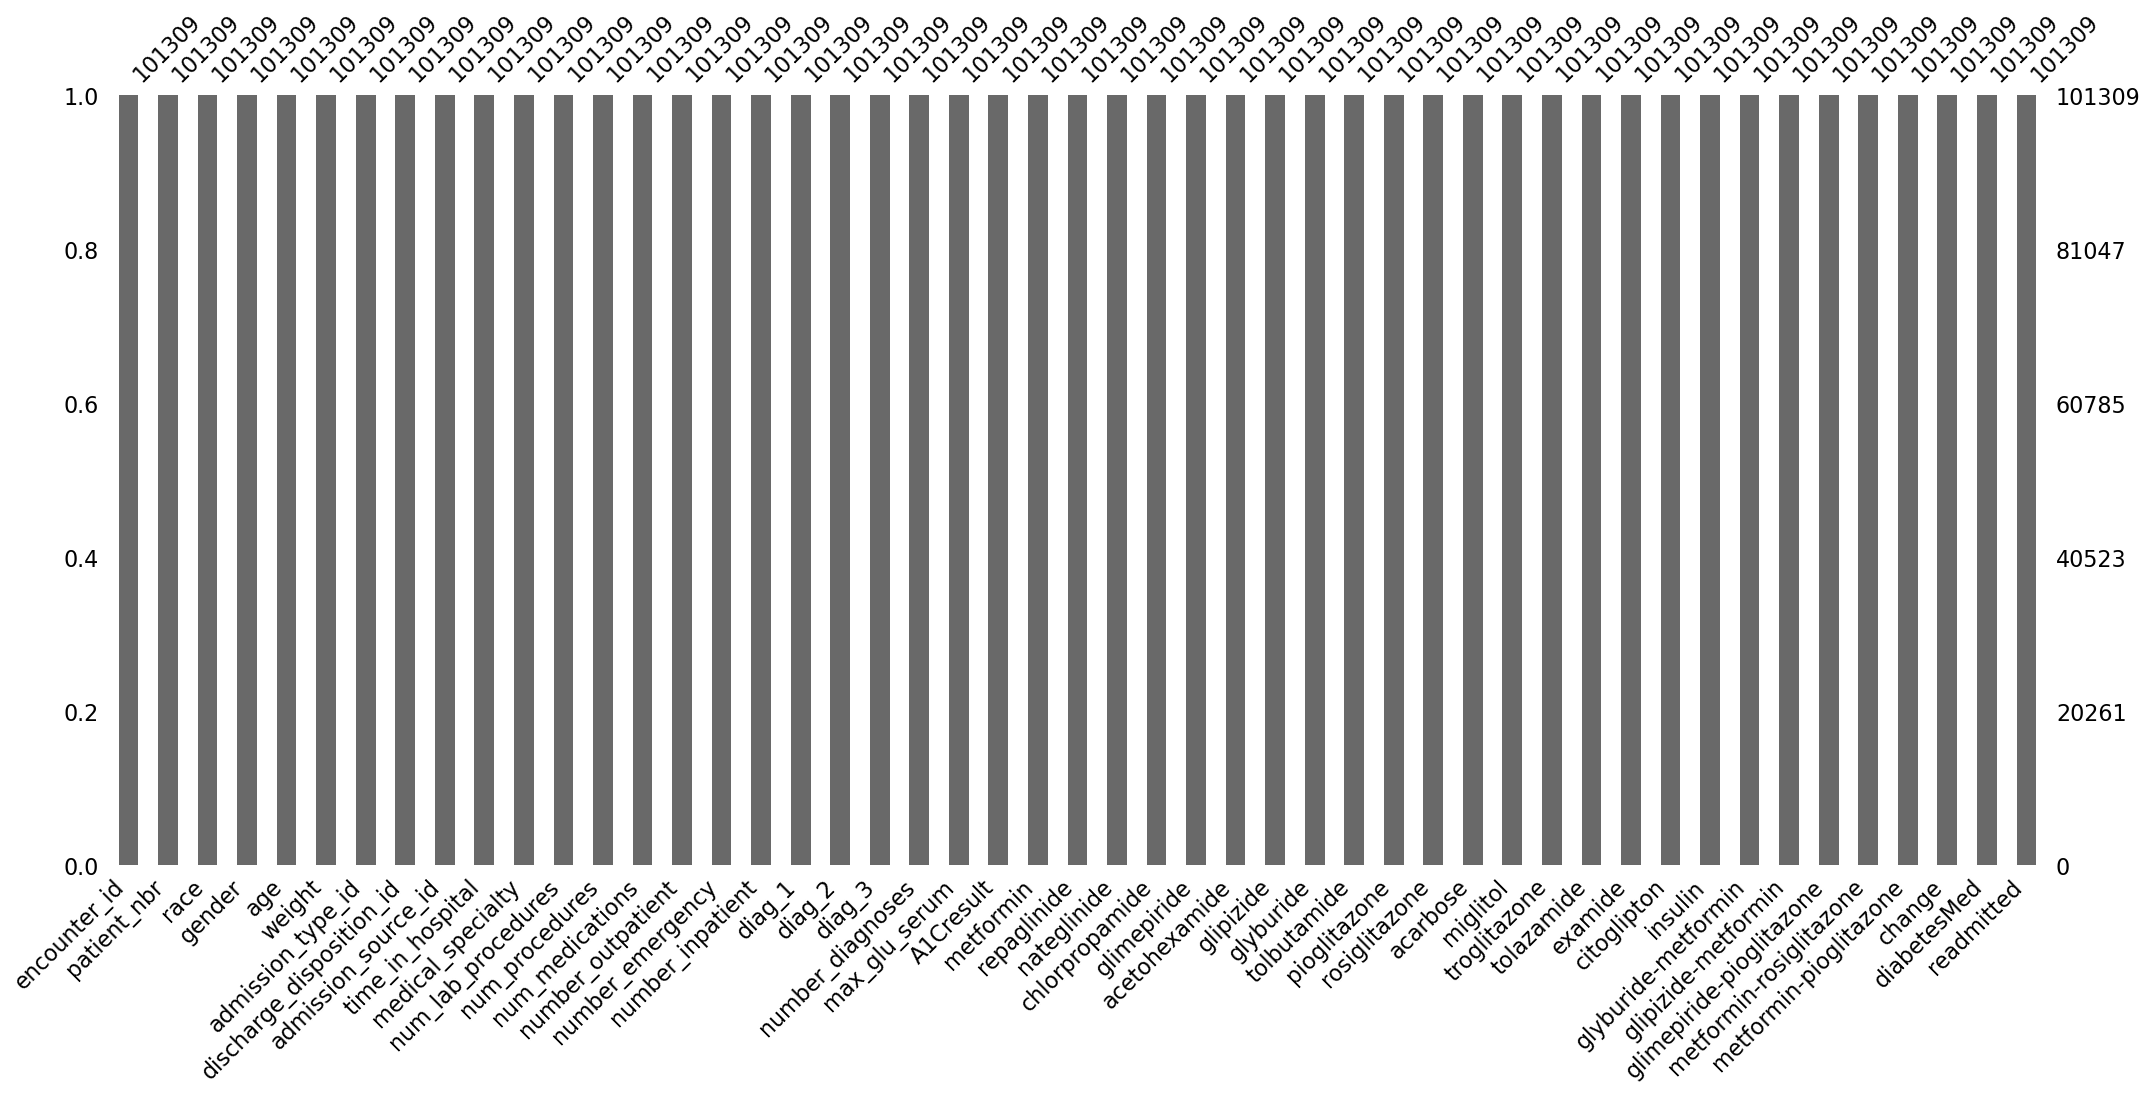

In [150]:
msno.bar(diabetes)

In [151]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,1,1,1,999,6,25,1,1,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,1,1,2,999,1,1,7,3,...,0,3,0,0,0,0,0,1,1,1
2,64410,86047875,2,1,3,999,1,1,7,2,...,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,1,2,4,999,1,1,7,2,...,0,3,0,0,0,0,0,1,1,0
4,16680,42519267,1,2,5,999,1,1,7,1,...,0,2,0,0,0,0,0,1,1,0


## Converting Categroical Features into Numeric Features

In [152]:
# Using get_dummies from the pandas library to convert categorical feature to numeric
diabetes = pd.get_dummies(diabetes, drop_first = False)

# Breaking the data into train & test data 

In [153]:
train_df, valid_df, test_df = np.split(diabetes.sample(frac=1, random_state=42), 
                                       [int(.7*len(diabetes)), int(0.85*len(diabetes))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [154]:
diabetes.readmitted.value_counts()

0    54593
1    35431
2    11285
Name: readmitted, dtype: int64

In [155]:
train_df.readmitted.value_counts()

0    38218
1    24751
2     7947
Name: readmitted, dtype: int64

In [156]:
valid_df.readmitted.value_counts()

0    8177
1    5334
2    1685
Name: readmitted, dtype: int64

In [157]:
test_df.readmitted.value_counts()

0    8198
1    5346
2    1653
Name: readmitted, dtype: int64

# Treating the Imbalance in the Data

In [159]:
def calc_prevalence(y_actual):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''
    
    return (sum(y_actual)/len(y_actual))

In [160]:
# split the training data into positive and negative
rows_pos = train_df.readmitted == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
readmitted_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples 
readmitted_df_balanced = readmitted_df_balanced.sample(n = len(readmitted_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(readmitted_df_balanced), \
                                                calc_prevalence(readmitted_df_balanced.readmitted.values)))

Train balanced prevalence(n = 49502):0.670


In [161]:
readmitted_df_balanced.readmitted.value_counts()

1    24751
0    20554
2     4197
Name: readmitted, dtype: int64

In [162]:
X_train = readmitted_df_balanced.drop('readmitted',axis=1)

y_train = readmitted_df_balanced['readmitted']

X_valid = valid_df.drop('readmitted',axis=1)

y_valid = valid_df['readmitted']

X_test = test_df.drop('readmitted',axis=1)

y_test = test_df['readmitted']

In [163]:
scaler=StandardScaler()
X_train[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']] = pd.DataFrame(scaler.fit_transform(X_train[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']]),columns=['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses'])
X_valid[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']] = pd.DataFrame(scaler.transform(X_valid[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']]),columns=['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses'])
X_test[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']] = pd.DataFrame(scaler.transform(X_test[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']]),columns=['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses'])

# Creating and Understanding Models

In [164]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    
    '''
    This function calculates all the metrics to asses the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [165]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101309 entries, 0 to 101765
Columns: 2325 entries, encounter_id to A1Cresult_>8
dtypes: float64(1), int64(41), uint8(2283)
memory usage: 253.8 MB


In [166]:
np.any(np.isnan(X_train))

False

In [167]:
np.all(np.isfinite(X_train))

True

## Linear Regression


In [168]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)


y_valid_preds = lnr.predict(X_valid)

In [169]:
y_valid_preds

array([0.37642843, 0.71606469, 0.45178387, ..., 0.77636247, 0.62253441,
       0.82920838])

In [172]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:


ValueError: multi_class must be in ('ovo', 'ovr')